In [16]:
import pandas as pd

import seaborn as sns

%matplotlib inline

### Data Source:
https://www.kaggle.com/datasets/hosseinmousavi/marriage-and-divorce-dataset

### Quick Exploration
Download, then import the dataset.
Delete all rows with null or missing values.
Next, take a look at the headers and the first 5 rows of the data

In [17]:
marriage = pd.read_csv("Marriage_Divorce_DB.csv")

marriage.dropna(inplace=True)
marriage.head()

,Age Gap,Education,Economic Similarity,Social Similarities,Cultural Similarities,Social Gap,Common Interests,Religion Compatibility,No of Children from Previous Marriage,Desire to Marry,...,Addiction,Loyalty,Height Ratio,Good Income,Self Confidence,Relation with Non-spouse Before Marriage,Spouse Confirmed by Family,Divorce in the Family of Grade 1,Start Socializing with the Opposite Sex Age,Divorce Probability
0,0.111633,1.915111,10.998678,76.456065,47.847460,50.317656,88.099898,83.738075,4.402822,22.868019,...,3.134119,49.648480,30.822948,94.499164,45.964824,2.032610,1.719332,2.262242,24.356772,2.760190
1,3.355384,2.957842,82.138120,48.656031,30.188517,54.114612,57.020971,98.408133,4.367024,40.336843,...,2.067377,75.220699,68.268221,41.102605,65.387715,1.053402,1.456192,9.795998,19.667152,1.962979
2,6.527365,2.772463,26.337826,59.356238,10.340252,76.595377,80.590985,41.743462,1.197120,45.941845,...,3.599095,22.551866,59.134874,23.053577,84.271897,8.268308,7.095241,9.986173,15.522517,2.858803
3,5.203075,1.729242,66.956033,5.472612,1.003407,55.071435,99.718078,70.493011,3.392041,2.924863,...,1.549274,99.172136,40.984117,43.400040,96.081229,5.852371,6.570749,5.099396,34.665933,1.404621
4,6.864962,4.370290,76.245035,26.797234,93.291581,73.736241,52.896199,11.729729,2.373553,89.851492,...,4.031738,21.629472,89.122381,51.615509,53.330824,9.717223,7.609152,1.294295,22.545763,1.318819


### Target Variable

We see that the class/target variable is titled 'Divorce Probability'

We draw an histogram of that attribute to see the spread of values.

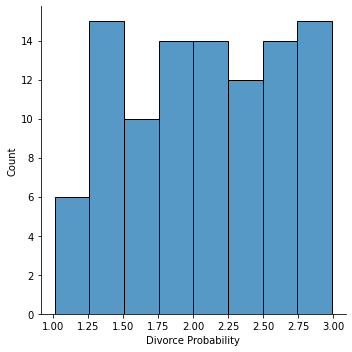

In [18]:
sns.displot(marriage['Divorce Probability'])

### Target Variable Converstion

We see that the 'Divorce Probability' attribute has values ranging from 1.0 to 3.0, continous.

We choose 2.0 as the splitting point.

In [19]:
def create_class(row):
    if row['Divorce Probability'] <= 2.0:
        return 'Marry'
    else:
        return 'Divorce'

### Create new Target Variable

We create a new attribute called 'Class' and populate it according to our chosen criteria.

Note: There are many ways of doing this, but using an `apply` statement is fast, pythonic and avoids looping over the rows.

In [20]:
marriage["Recommendation"] = marriage.apply(create_class, axis=1)

In [21]:
marriage.head()

,Age Gap,Education,Economic Similarity,Social Similarities,Cultural Similarities,Social Gap,Common Interests,Religion Compatibility,No of Children from Previous Marriage,Desire to Marry,...,Loyalty,Height Ratio,Good Income,Self Confidence,Relation with Non-spouse Before Marriage,Spouse Confirmed by Family,Divorce in the Family of Grade 1,Start Socializing with the Opposite Sex Age,Divorce Probability,Recommendation
0,0.111633,1.915111,10.998678,76.456065,47.847460,50.317656,88.099898,83.738075,4.402822,22.868019,...,49.648480,30.822948,94.499164,45.964824,2.032610,1.719332,2.262242,24.356772,2.760190,Divorce
1,3.355384,2.957842,82.138120,48.656031,30.188517,54.114612,57.020971,98.408133,4.367024,40.336843,...,75.220699,68.268221,41.102605,65.387715,1.053402,1.456192,9.795998,19.667152,1.962979,Marry
2,6.527365,2.772463,26.337826,59.356238,10.340252,76.595377,80.590985,41.743462,1.197120,45.941845,...,22.551866,59.134874,23.053577,84.271897,8.268308,7.095241,9.986173,15.522517,2.858803,Divorce
3,5.203075,1.729242,66.956033,5.472612,1.003407,55.071435,99.718078,70.493011,3.392041,2.924863,...,99.172136,40.984117,43.400040,96.081229,5.852371,6.570749,5.099396,34.665933,1.404621,Marry
4,6.864962,4.370290,76.245035,26.797234,93.291581,73.736241,52.896199,11.729729,2.373553,89.851492,...,21.629472,89.122381,51.615509,53.330824,9.717223,7.609152,1.294295,22.545763,1.318819,Marry


### Verify and Save

Check if all values have been successfully converted, then save the dataframe to a csv file.

In [23]:
marriage["Recommendation"].value_counts()

Divorce    55
Marry      45
Name: Recommendation, dtype: int64

In [24]:
marriage.to_csv("Processed_Marriage_Divorce_DB.csv",index=False)